# Breast Cancer Dataset Tutorial


## 1. Introduction

The Breast Cancer dataset is a classic binary classification problem. It contains 569 samples with 30 features, such as radius, texture, perimeter, etc. The goal is to predict whether a tumor is malignant (1) or benign (0).

## 2. Setup

### 2.1 Importing Libraries

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### 2.2 Loading the Dataset

In [43]:
# Load dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  #Labels (0 = malignant, 1 = benign)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.3 Model Evaluation Function

In [44]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

### 2.4 ROC Curve Function

In [45]:
from sklearn.metrics import roc_curve,auc

def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    

## 3. Training and Evaluating Models

### 3.1 Decision Tree Classifier

In [46]:
# 1. Decision Tree
print("Decision Tree:")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test)

Decision Tree:
Accuracy: 0.95
ROC AUC: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### 3.2 Random Forest Classifier

In [47]:
# 2. Random Forest
print("Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

Random Forest:
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### 3.3 XGBoost Classifier

In [48]:
# 3. XGBoost
print("XGBoost:")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)

XGBoost:
Accuracy: 0.97
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



C:\Users\Techno Matique\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [00:49:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 3.4 K-Nearest Neighbors (KNN)

In [49]:
# 4. K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test)

K-Nearest Neighbors (KNN):
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



- ## ROC Curve 

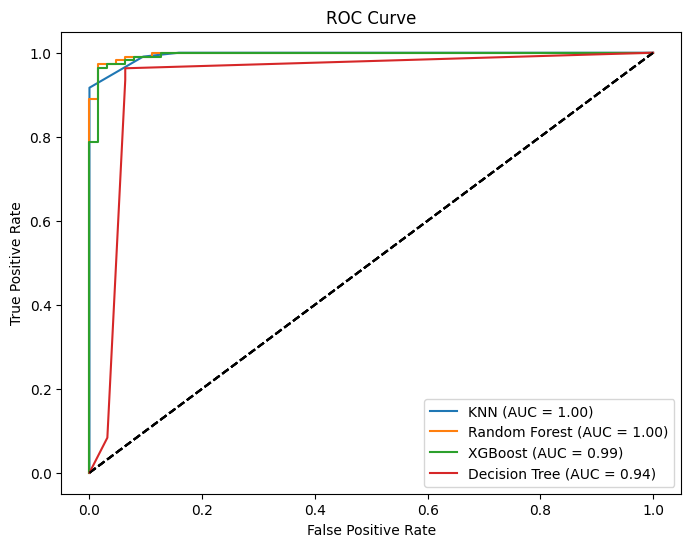

In [50]:
plt.figure(figsize=(8, 6))
plot_roc_curve(knn_model, X_test, y_test, 'KNN')
plot_roc_curve(rf_model,X_test, y_test, 'Random Forest')
plot_roc_curve(xgb_model, X_test, y_test, 'XGBoost')
plot_roc_curve(dt_model, X_test, y_test, 'Decision Tree')
plt.show()

## 4. Hyperparameter Tuning

### 4.1 Decision Tree 

- #### Grid Search for Decision Trees

In [51]:
param_grid_dt ={
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [52]:
# Set up GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)

grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

- #### Evaluate the best model

In [53]:
# Get the best model
best_dt_model = grid_search_dt.best_estimator_


# Evaluate on the test set
y_pred = best_dt_model.predict(X_test)
print(f"Best Parameters: {grid_search_dt.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



 ### 4.2 Random forest

- #### Grid Search for Random forest

In [54]:

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}


In [55]:

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

- #### Evaluate the Best Model

In [56]:
# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_rf_model.predict(X_test)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### 4.3 XGBoost 

- #### Grid Search for XGBoost

In [57]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [3, 5, 7],           # Profondeur maximale des arbres
    'learning_rate': [0.01, 0.1, 0.2], # Taux d'apprentissage
    'min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons pour diviser un nœud
}

In [58]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

- #### Evaluate the Best Model

In [59]:
#fit the model
grid_search_xgb.fit(X_train, y_train)
#get the best one
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



C:\Users\Techno Matique\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [00:50:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 4.4 KNN 

- #### Grid Search for KNN

In [60]:

# Define the parameter grid
param_grid = {
    'n_neighbors': [5, 10, 15],  # Number of trees in the forest
    'metric': ['minkowski', 'euclidean', 'manhattan'],      # Maximum depth of the tree
    'p': [1, 2, 3]  # Minimum number of samples required to split a node
}


In [61]:
#4. Perform Grid Search
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 10, 15], 'p': [1, 2, 3]},
             scoring='accuracy', verbose=1)

- #### Evaluate the Best Model

In [62]:

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## ROC Curve

Decision Tree

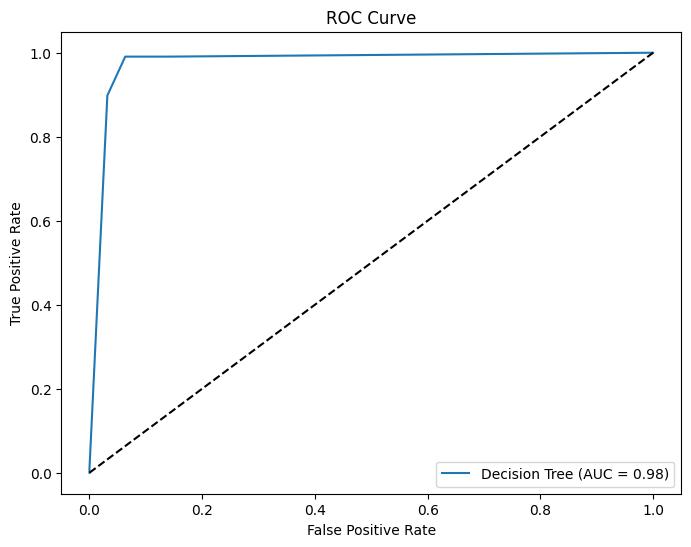

In [63]:
plt.figure(figsize=(8, 6))
plot_roc_curve(best_dt_model, X_test, y_test, 'Decision Tree')
plt.show()


Random Forest

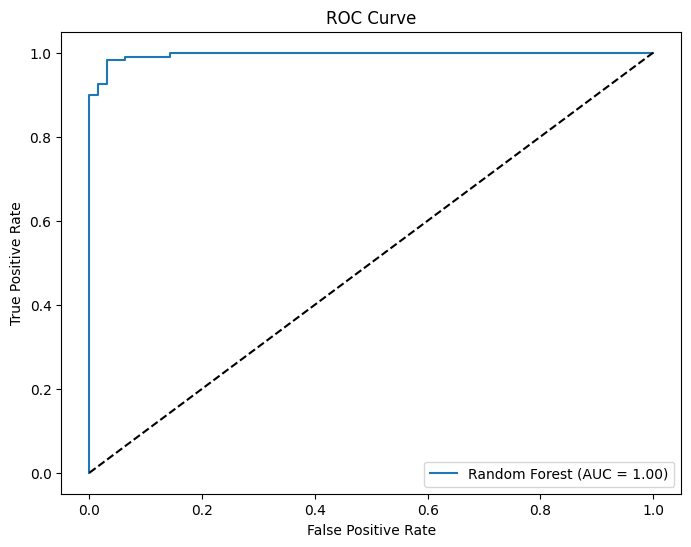

In [64]:
plt.figure(figsize=(8, 6))
plot_roc_curve(best_rf_model, X_test, y_test, 'Random Forest')
plt.show()

XGBoost

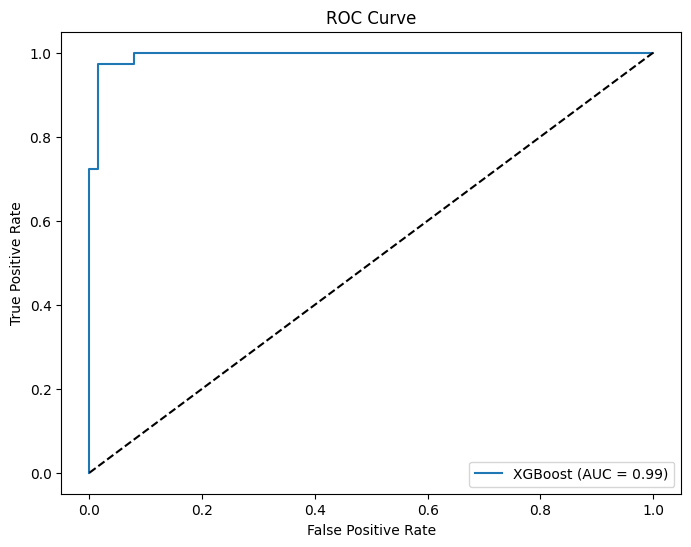

In [65]:
plt.figure(figsize=(8, 6))
plot_roc_curve(best_xgb_model, X_test, y_test, 'XGBoost')
plt.show()

KNN

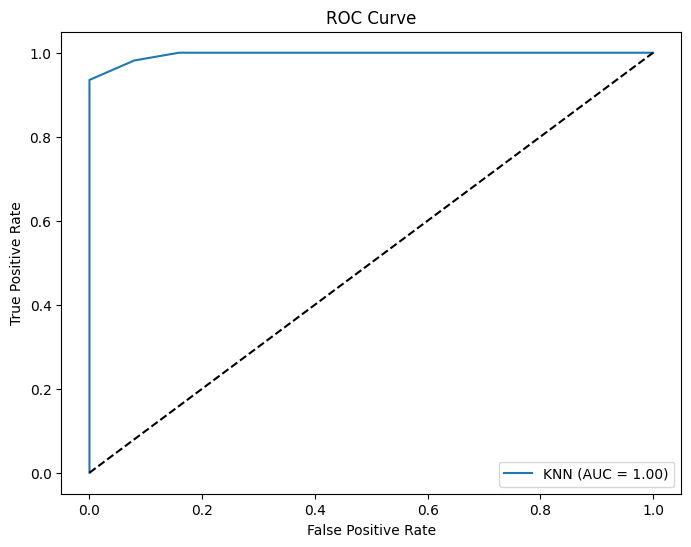

In [66]:
plt.figure(figsize=(8, 6))
plot_roc_curve(best_model, X_test, y_test, 'KNN')
plt.show()

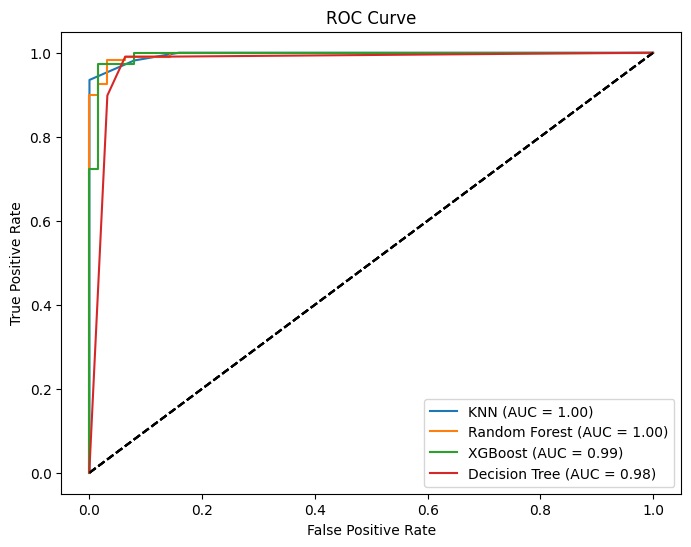

In [67]:
plt.figure(figsize=(8, 6))
plot_roc_curve(best_model, X_test, y_test, 'KNN')
plot_roc_curve(best_rf_model,X_test, y_test, 'Random Forest')
plot_roc_curve(best_xgb_model, X_test, y_test, 'XGBoost')
plot_roc_curve(best_dt_model, X_test, y_test, 'Decision Tree')
plt.show()

## 5. Feature Importance

### 5.1 Decision Tree

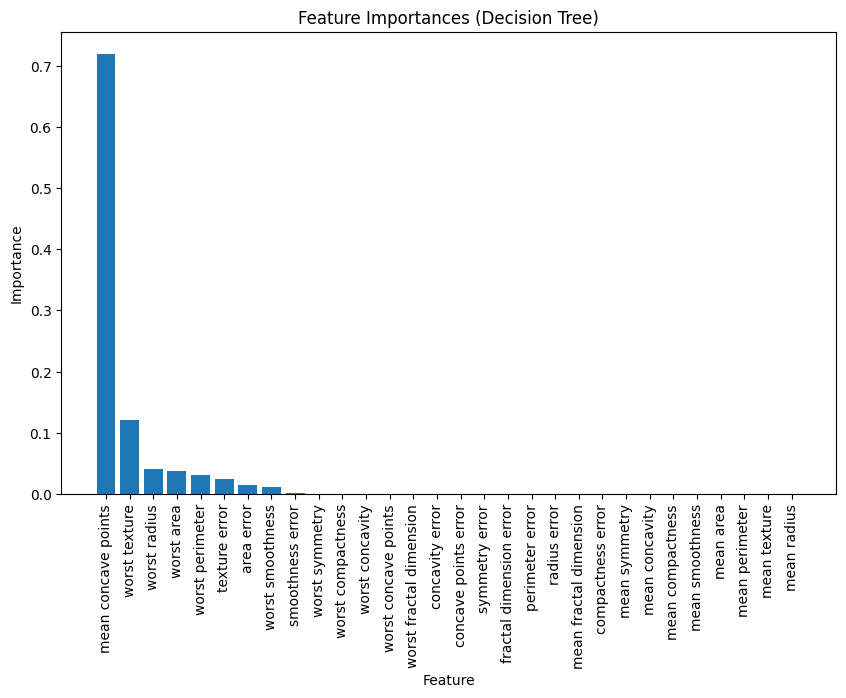

In [68]:
# Plot feature importance for decision Forest
importances = dt_model.feature_importances_
feature_names = data.feature_names
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

- #### Extract the top 10 important features

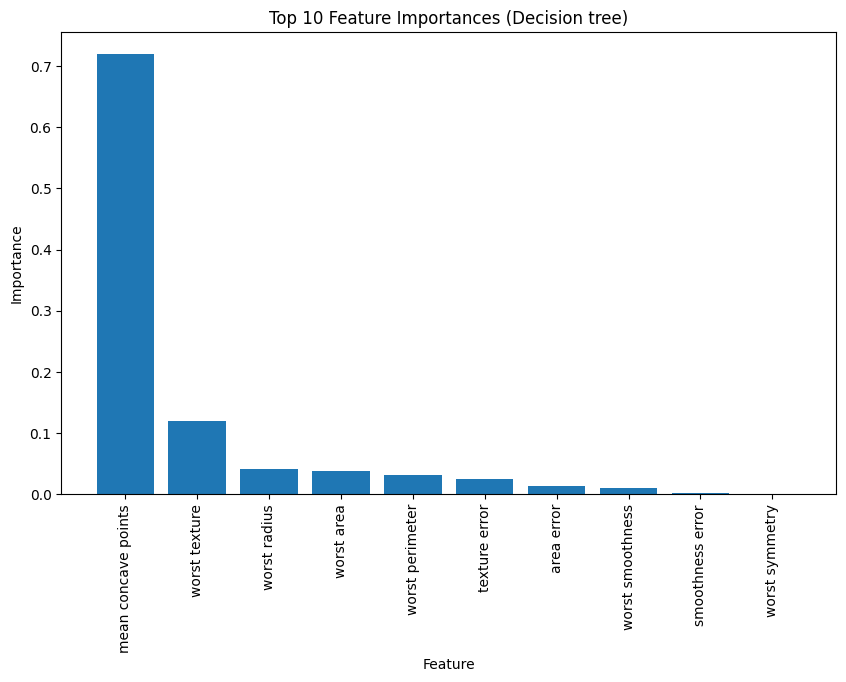

In [69]:
# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Select the top 10 features
top_10_indices = indices[:10]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Decision tree)")
plt.bar(range(10), importances[top_10_indices], align="center")
plt.xticks(range(10), [feature_names[i] for i in top_10_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

- #### Retraining the model on the top 10 important features

In [70]:
# Selecting the top 10 features
X_train_top10 = X_train[:, top_10_indices]
X_test_top10 = X_test[:, top_10_indices]

# Retrain the Decision tree model on the reduced feature set
dt_model.fit(X_train_top10, y_train)

# Evaluate the model
evaluate_model(dt_model, X_test_top10, y_test)

Accuracy: 0.95
ROC AUC: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### 5.2 Random Forest 

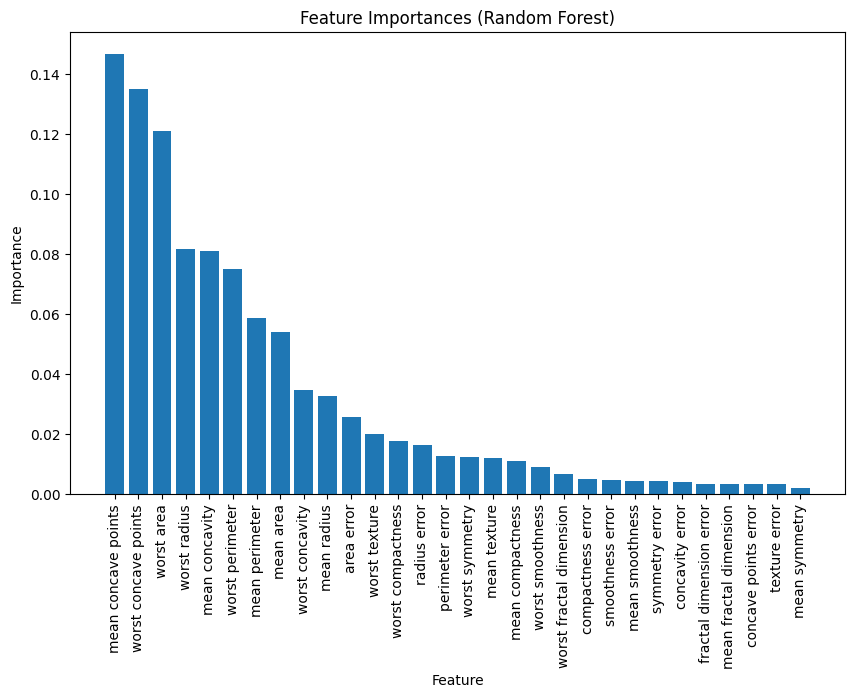

In [71]:
# Plot feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = data.feature_names
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

- #### Extract the top 10 important features

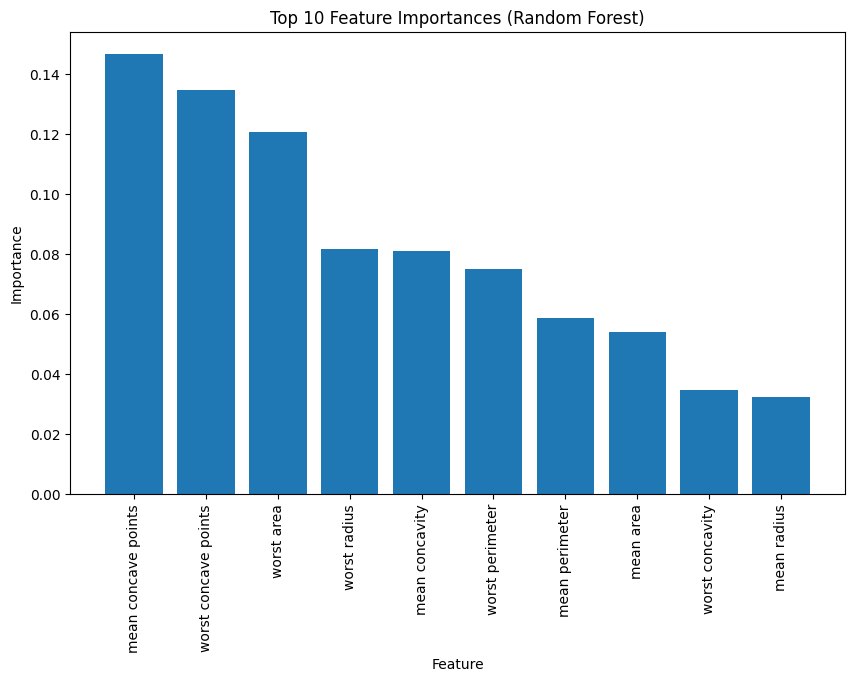

In [72]:
# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Select the top 10 features
top_10_indices = indices[:10]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.bar(range(10), importances[top_10_indices], align="center")
plt.xticks(range(10), [feature_names[i] for i in top_10_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

- #### Retraining the model on the top 10 important features

In [73]:
# Selecting the top 10 features
X_train_top10 = X_train[:, top_10_indices]
X_test_top10 = X_test[:, top_10_indices]

# Retrain the Random Forest model on the reduced feature set
rf_model.fit(X_train_top10, y_train)

# Evaluate the model
evaluate_model(rf_model, X_test_top10, y_test)


Accuracy: 0.96
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### 5.3 XGBoost

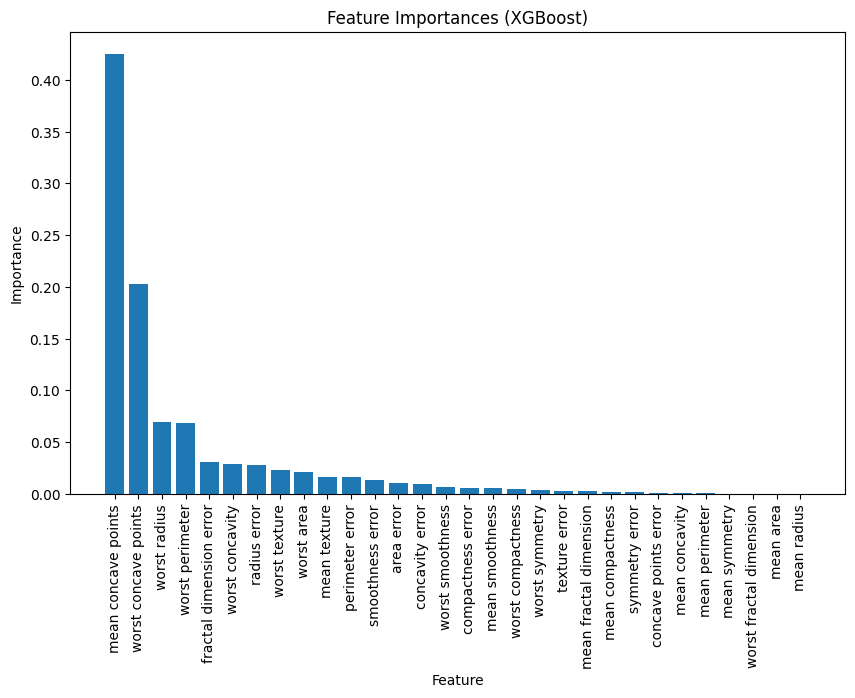

In [74]:
importances = best_xgb_model.feature_importances_
feature_names = data.feature_names
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

We will consider the following 10 most important features :
1- mean concave points.
2- worst concave points.
3- worst radius.
4- worst perimeter.
5- fractal dimension error.
6- worst concavity.
7- radius error.
8- worst texture.
9- worst area.
10- mean texture.

- #### Extract the top 10 important features

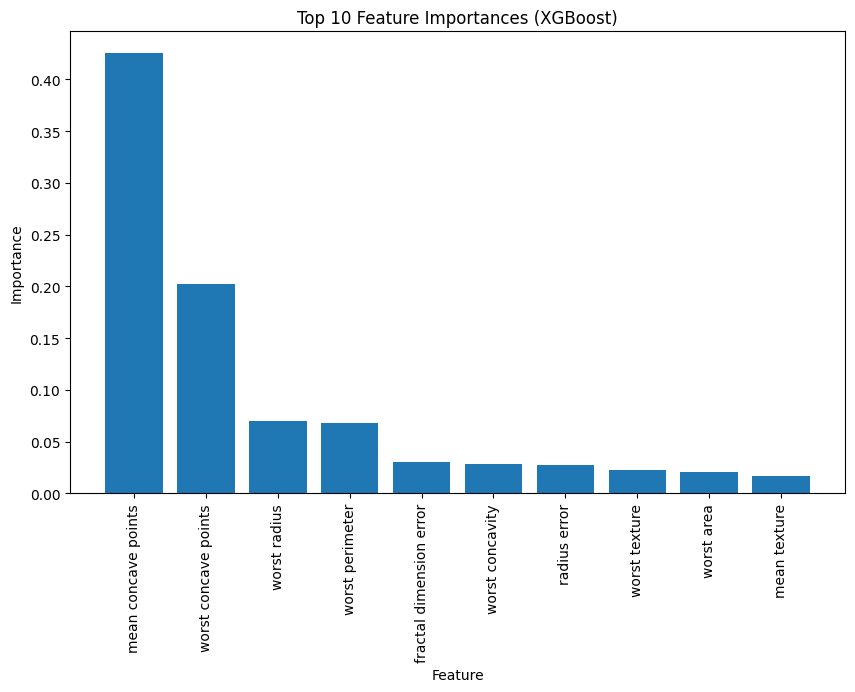

In [75]:
# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Select the top 10 features
top_10_indices = indices[:10]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (XGBoost)")
plt.bar(range(10), importances[top_10_indices], align="center")
plt.xticks(range(10), [feature_names[i] for i in top_10_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

- #### Retraining the model on the top 10 important features

In [76]:
# Selecting the top 10 features
X_train_top10 = X_train[:, top_10_indices]
X_test_top10 = X_test[:, top_10_indices]

# Retrain the XGBoost model on the reduced feature set
xgb_model.fit(X_train_top10, y_train)

# Evaluate the model
evaluate_model(xgb_model, X_test_top10, y_test)

Accuracy: 0.97
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



C:\Users\Techno Matique\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [00:50:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 5.4 KNN

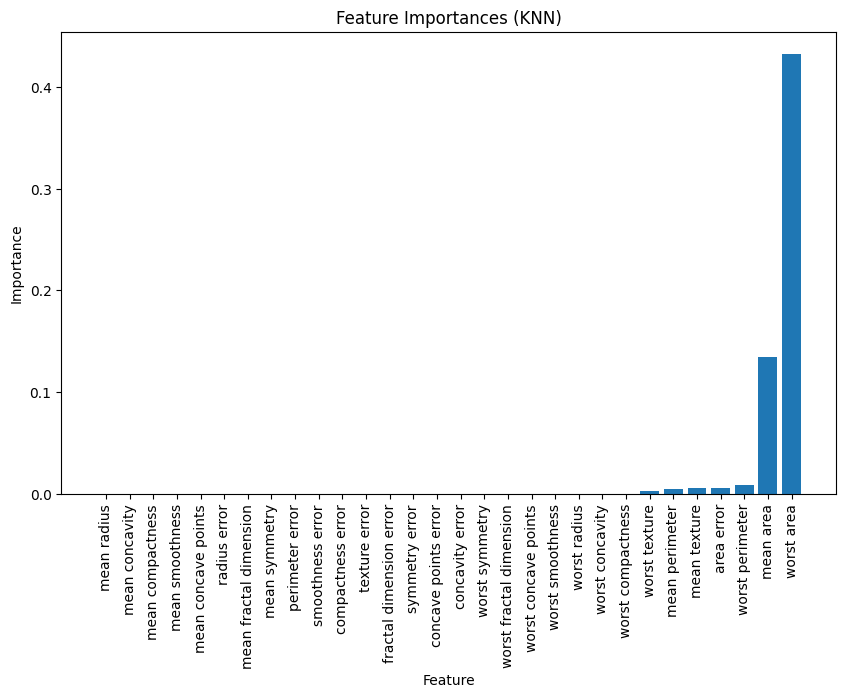

In [77]:
# 4. Importance des features par permutation
from sklearn.inspection import permutation_importance
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean
indices = np.argsort(importance)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (KNN)")
plt.bar(range(X.shape[1]), importance[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

- #### Extract the top 10 important features

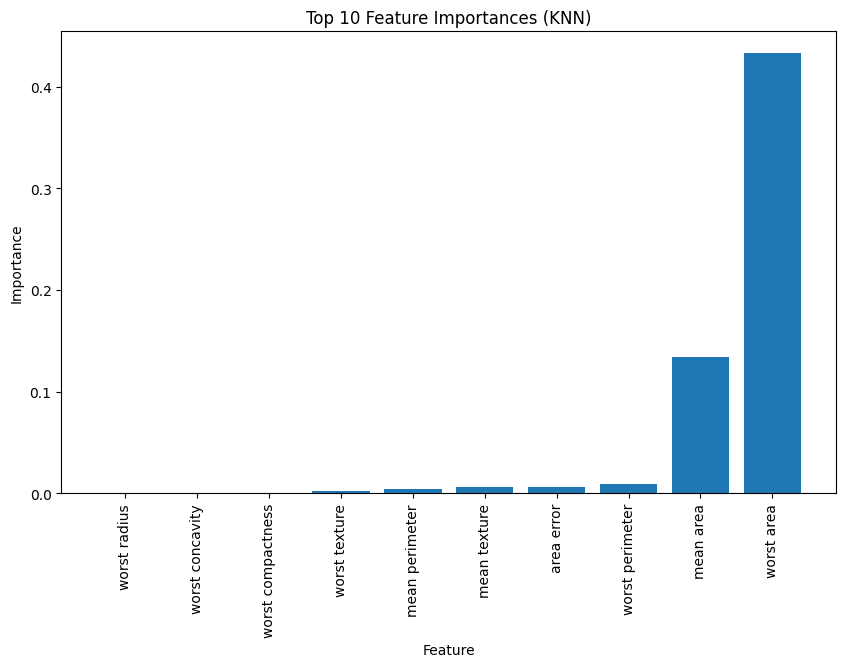

In [78]:
# Get the indices of the top 10 features
top_10_indices = np.argsort(importance)[-10:]  # Selects top 10 based on importance

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (KNN)")
plt.bar(range(10), importance[top_10_indices], align="center")
plt.xticks(range(10), [feature_names[i] for i in top_10_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

- #### Retraining the model on the top 10 important features

In [79]:
# Selecting the top 10 features
X_train_top10 = X_train[:, top_10_indices]
X_test_top10 = X_test[:, top_10_indices]

# Retrain the knn model on the reduced feature set
knn_model.fit(X_train_top10, y_train)

# Evaluate the model
evaluate_model(knn_model, X_test_top10, y_test)

Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



There isnt a big difference 

Accuracies comparisons ( all / 10 top)

Decision tree: 0.97 / 0.95

Random forest: 0.96 / 0.96

XGboost : 0.96 / 0.97

KNN : 0.96 / 0.96